# **Linear Regression**

In this notebook we will create Linear Regression models of different degrees using **NumPy** and **Scikit-Learn**.

First, let's import **NumPy**.

In [2]:
import numpy as np

Let's create a dataset for our little experiments.

In [42]:
np.random.seed(42)  # to make this code example reproducible
n = 100  # number of examples (or instances) in our data
X_train = 2 * np.random.rand(n, 1)  # generating input with uniform random values  # column vector
y_train = 4 + 3 * X_train + np.random.randn(n, 1)  # generating output with a simple formula plus gaussian noise  # column vector

In [43]:
np.hstack((X_train, y_train))[:10, :]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995],
       [0.31198904, 5.29307969],
       [0.11616722, 5.82639572],
       [1.73235229, 8.67878666],
       [1.20223002, 6.79819647],
       [1.41614516, 7.74667842]])

First, we will visualize the data.

Let's import **matplotlib** for this.

In [11]:
import matplotlib.pyplot as plt

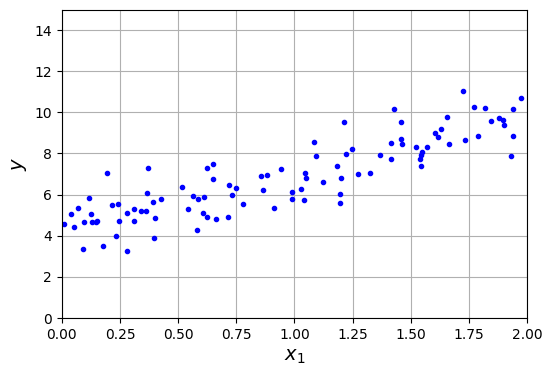

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")  # showing as blue dots
plt.xlabel("$x_1$", fontsize=14)  # using TeX formatting
plt.ylabel("$y$", fontsize=14)  # using TeX formatting
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

For Linear Regression we need X to have a column of all values equal to 1. Let's prepend such column.

In [18]:
X_train.shape

(100, 1)

In [48]:
ones = np.ones((X_train.shape[0], 1))
X = np.hstack((ones, X_train))
y = y_train

In [22]:
X.shape

(100, 2)

In [78]:
np.hstack((X, y))[:10, :]

array([[ 1.        , -0.75275929,  0.56664654,  1.61761105],
       [ 1.        ,  2.70428584,  7.3131619 ,  8.06185944],
       [ 1.        ,  1.39196365,  1.93756281,  4.45250583],
       [ 1.        ,  0.59195091,  0.35040587,  0.77958493],
       [ 1.        , -2.06388816,  4.25963433,  1.84625712],
       [ 1.        , -2.06403288,  4.26023172,  2.42319555],
       [ 1.        , -2.65149833,  7.03044338,  4.34161741],
       [ 1.        ,  2.19705687,  4.82705891,  6.09231611],
       [ 1.        ,  0.60669007,  0.36807284,  1.98223289],
       [ 1.        ,  1.24843547,  1.55859111,  3.52597398]])

Remember the formula from the lecture for solving the system of equations: $\textbf{a} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

Now let's do it in NumPy:

In [63]:
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
a

array([[4.21509616],
       [2.77011339]])

This means that our model is this:

In [64]:
print(f"yHat = {a.flat[0]} + {a.flat[1]} * x")

yHat = 4.21509615754675 + 2.7701133864384806 * x


This is how you use it without anything fancy:

In [65]:
X_test = 1.25

yHat = a.flat[0] + a.flat[1] * X_test
yHat

7.677737890594851

This is how you use it generally without worrying how many parameters there are and how many predictions to do:

In [66]:
X_test = np.array([[1.25]])
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test))

yHat = X_test.dot(a)
yHat

array([[7.67773789]])

Let's predict $\hat{y}$ at two $x$ and plot our result.

In [57]:
X_test = np.array([[1.25], [1.75]])
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test))

yHat = X_test.dot(a)
yHat

array([[7.67773789],
       [9.06279458]])

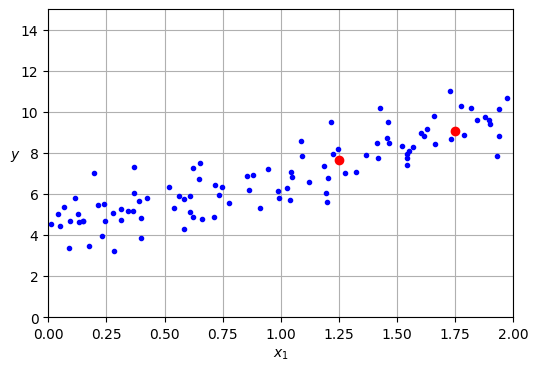

In [58]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test[:, 1], yHat, "ro")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Let's plot our model.

In [69]:
X_test = np.linspace(0, 2, 100).reshape(100, 1)  # 100 values between 0 and 2
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test))

yHat = X_test.dot(a)

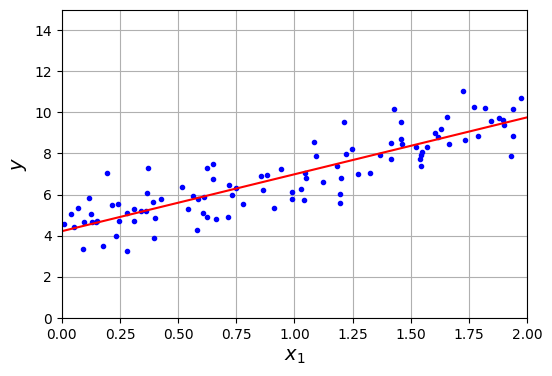

In [71]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test[:, 1], yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Linear Regression with a quadratic polynomial

In [72]:
np.random.seed(42)
n = 100
X_train = 6 * np.random.rand(n, 1) - 3
y_train = 0.5 * X_train ** 2 + X_train + 2 + np.random.randn(n, 1)

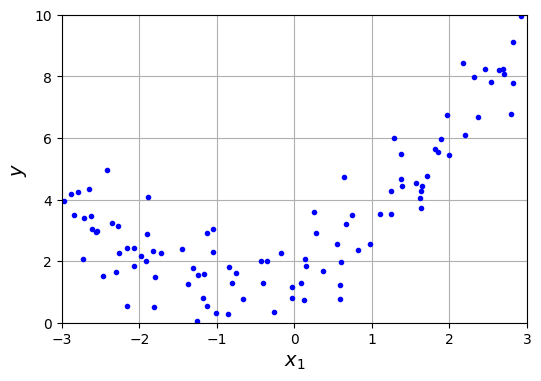

In [73]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [74]:
X_train.shape

(100, 1)

In [75]:
ones = np.ones((X_train.shape[0], 1))
X = np.hstack((ones, X_train, X_train * X_train))  # creating our matrix with 3 columns
y = y_train

In [76]:
X.shape

(100, 3)

In [77]:
np.hstack((X, y))[:10, :]

array([[ 1.        , -0.75275929,  0.56664654,  1.61761105],
       [ 1.        ,  2.70428584,  7.3131619 ,  8.06185944],
       [ 1.        ,  1.39196365,  1.93756281,  4.45250583],
       [ 1.        ,  0.59195091,  0.35040587,  0.77958493],
       [ 1.        , -2.06388816,  4.25963433,  1.84625712],
       [ 1.        , -2.06403288,  4.26023172,  2.42319555],
       [ 1.        , -2.65149833,  7.03044338,  4.34161741],
       [ 1.        ,  2.19705687,  4.82705891,  6.09231611],
       [ 1.        ,  0.60669007,  0.36807284,  1.98223289],
       [ 1.        ,  1.24843547,  1.55859111,  3.52597398]])

In [82]:
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
a

array([[1.78134581],
       [0.93366893],
       [0.56456263]])

In [83]:
X_test = np.linspace(-3, 3, 100).reshape(100, 1)
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test, X_test * X_test))

yHat = X_test.dot(a)

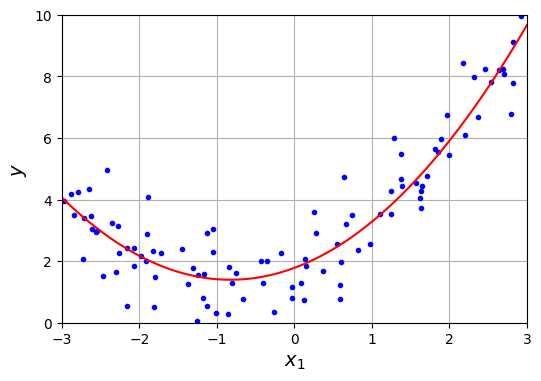

In [85]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test[:, 1], yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

# **The same in Scikit-Learn**

**Scikit-Learn** is a popular package containing a collection of tools for machine learning. See more at http://scikit-learn.org.

Let's repeat everything that we done so far but in **Scikit-Learn**.

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
np.random.seed(42)
n = 100
X_train = 2 * np.random.rand(n, 1)
y_train = 4 + 3 * X_train + np.random.randn(n, 1)

Creating the model:

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # fitting the model to the data (we can also say "training the model")
lin_reg.intercept_, lin_reg.coef_  # the two parameters

(array([4.21509616]), array([[2.77011339]]))

Doing predictions:

In [90]:
X_test = np.array([[1.25]])

yHat = lin_reg.predict(X_test)  # this function uses our model to predict the output for the given input
yHat

array([[7.67773789]])

Plotting:

In [93]:
X_test = np.linspace(0, 2, 100).reshape(100, 1)
yHat = lin_reg.predict(X_test)  # predicting the output for each value

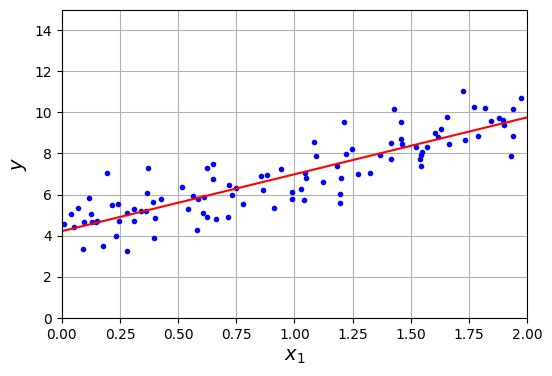

In [94]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Now with quadratic polynomial

In [95]:
np.random.seed(42)
n = 100
X_train = 6 * np.random.rand(n, 1) - 3
y_train = 0.5 * X_train ** 2 + X_train + 2 + np.random.randn(n, 1)

We need to add feature where the $x$ is squared:

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)  # definint degree and that we don't need the column with all ones
X_poly = poly_features.fit_transform(X_train)  # creating the features
X_poly[:20, :]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433],
       [-2.06403288,  4.26023172],
       [-2.65149833,  7.03044338],
       [ 2.19705687,  4.82705891],
       [ 0.60669007,  0.36807284],
       [ 1.24843547,  1.55859111],
       [-2.87649303,  8.27421218],
       [ 2.81945911,  7.94934969],
       [ 1.99465584,  3.97865194],
       [-1.72596534,  2.97895634],
       [-1.9090502 ,  3.64447265],
       [-1.89957294,  3.60837736],
       [-1.17454654,  1.37955958],
       [ 0.14853859,  0.02206371],
       [-0.40832989,  0.1667333 ],
       [-1.25262516,  1.56906979]])

Creating the model:

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Plotting:

In [102]:
X_test = np.linspace(-3, 3, 100).reshape(100, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_test)
yHat = lin_reg.predict(X_poly)

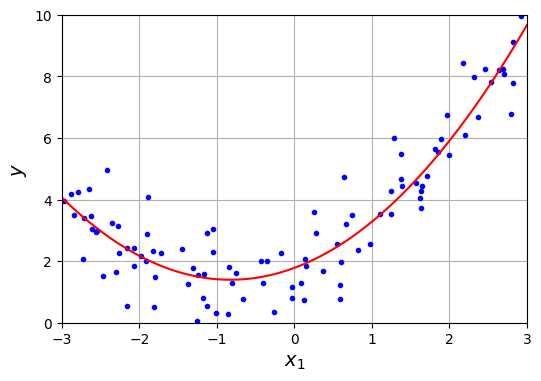

In [104]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

---
*Some parts of this notebook are partially based on the book <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/" target="_blank">“Hands-On Machine Learning”</a> and it's <a href="https://github.com/ageron/handson-ml3" target="_blank">GitHub repo.</a>*